# **Machine Learning**

## **Imports et Dataframes**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, RandomizedSearchCV, learning_curve, KFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest, chi2, f_classif

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, precision_recall_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

from joblib import dump
from joblib import load

import warnings

In [3]:
# Filtrer les avertissements de type UserWarning et RuntimeWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [4]:
df = pd.read_csv('données/données_finales.csv')

In [5]:
# df['franchise'] = df['franchise'].apply(lambda x : 1 if x == 0 else x)

## **Découpage du dataset**

In [6]:
df

,mois,nb_employes,creation,emploi_crees,franchise,emplacement,cred_renouvelable,petit_pret,montant,secteur,TARGET,secure,type_entreprise
0,84,4,1,0,1,0,0,1,60000.0,44,0,0,TPE
1,60,2,1,0,1,0,0,1,40000.0,72,0,0,TPE
2,180,7,0,0,1,0,0,0,287000.0,62,0,0,TPE
3,60,2,0,0,1,0,0,1,35000.0,0,0,0,TPE
4,240,14,0,7,1,0,0,0,229000.0,0,0,0,PME
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745445,60,6,0,0,1,0,0,0,70000.0,44,0,0,TPE
745446,60,6,0,0,1,0,1,0,85000.0,44,0,0,TPE
745447,108,26,0,0,1,0,0,0,300000.0,31,0,0,PME
745448,60,6,0,0,1,0,0,1,75000.0,0,1,0,TPE


In [7]:
X = df.drop(['TARGET'], axis=1)
y = df['TARGET']

In [8]:
X

,mois,nb_employes,creation,emploi_crees,franchise,emplacement,cred_renouvelable,petit_pret,montant,secteur,secure,type_entreprise
0,84,4,1,0,1,0,0,1,60000.0,44,0,TPE
1,60,2,1,0,1,0,0,1,40000.0,72,0,TPE
2,180,7,0,0,1,0,0,0,287000.0,62,0,TPE
3,60,2,0,0,1,0,0,1,35000.0,0,0,TPE
4,240,14,0,7,1,0,0,0,229000.0,0,0,PME
...,...,...,...,...,...,...,...,...,...,...,...,...
745445,60,6,0,0,1,0,0,0,70000.0,44,0,TPE
745446,60,6,0,0,1,0,1,0,85000.0,44,0,TPE
745447,108,26,0,0,1,0,0,0,300000.0,31,0,PME
745448,60,6,0,0,1,0,0,1,75000.0,0,0,TPE


In [9]:
y

0         0
1         0
2         0
3         0
4         0
         ..
745445    0
745446    0
745447    0
745448    1
745449    0
Name: TARGET, Length: 745450, dtype: int64

## **Train_set & Test_set**

In [10]:
the_X_train, the_X_test, the_y_train, the_y_test = train_test_split(X, y, shuffle=True, train_size=0.98, random_state=42, stratify=y)
the_X_train

,mois,nb_employes,creation,emploi_crees,franchise,emplacement,cred_renouvelable,petit_pret,montant,secteur,secure,type_entreprise
140374,90,2,0,0,0,1,0,0,18000.0,44,0,TPE
455727,154,2,0,0,1,0,0,0,150000.0,92,0,TPE
328888,240,18,0,6,1,0,0,0,328000.0,0,0,PME
102549,60,2,1,1,0,1,0,0,90000.0,44,0,TPE
93175,52,1,0,0,0,2,0,0,10000.0,23,0,TPE
...,...,...,...,...,...,...,...,...,...,...,...,...
234572,168,6,0,0,0,0,0,0,200000.0,0,0,TPE
342155,72,3,0,0,1,0,0,0,50000.0,0,0,TPE
97932,240,7,0,0,1,0,0,0,112000.0,23,0,TPE
122866,84,2,0,0,1,0,0,0,25000.0,0,0,TPE


In [11]:
X_train, X_test, y_train, y_test = train_test_split(the_X_train, the_y_train, shuffle=True, train_size=0.90, random_state=42, stratify=the_y_train)
X_train

,mois,nb_employes,creation,emploi_crees,franchise,emplacement,cred_renouvelable,petit_pret,montant,secteur,secure,type_entreprise
152417,120,1,1,0,1,0,0,0,22000.0,0,0,TPE
520169,36,5,0,0,1,2,1,0,10000.0,44,0,TPE
481909,180,14,0,0,1,1,0,0,551000.0,31,0,PME
387436,48,2,0,0,1,1,0,0,50000.0,54,0,TPE
365374,60,2,0,0,1,1,0,0,30000.0,81,0,TPE
...,...,...,...,...,...,...,...,...,...,...,...,...
180930,12,31,0,0,1,0,0,0,10299.0,31,0,PME
491647,178,10,0,0,1,0,0,0,360500.0,0,0,PME
497291,60,1,0,0,1,1,0,0,35000.0,71,0,TPE
342767,84,3,0,0,1,0,0,0,83500.0,62,0,TPE


## **Dummy Modèle**

In [12]:
dummy = DummyClassifier()

In [13]:
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.8524673191431114

## **Création des Transformeurs**

In [14]:
df

,mois,nb_employes,creation,emploi_crees,franchise,emplacement,cred_renouvelable,petit_pret,montant,secteur,TARGET,secure,type_entreprise
0,84,4,1,0,1,0,0,1,60000.0,44,0,0,TPE
1,60,2,1,0,1,0,0,1,40000.0,72,0,0,TPE
2,180,7,0,0,1,0,0,0,287000.0,62,0,0,TPE
3,60,2,0,0,1,0,0,1,35000.0,0,0,0,TPE
4,240,14,0,7,1,0,0,0,229000.0,0,0,0,PME
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745445,60,6,0,0,1,0,0,0,70000.0,44,0,0,TPE
745446,60,6,0,0,1,0,1,0,85000.0,44,0,0,TPE
745447,108,26,0,0,1,0,0,0,300000.0,31,0,0,PME
745448,60,6,0,0,1,0,0,1,75000.0,0,1,0,TPE


In [15]:
cat_var = X.select_dtypes('object').columns
num_var = ["nb_employes", "emploi_crees", "franchise", "emplacement", "montant", "secteur", "mois"]
binaire_var = ["creation", "cred_renouvelable", "petit_pret", "secure"]

cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = RobustScaler()
binaire_transformer = OneHotEncoder()

encoder = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_var),
        ('num', num_transformer, num_var),
        ('bin', binaire_transformer, binaire_var)
    ], 
    remainder='passthrough'
)

## **Fonction Évaluation**

In [16]:
model_entraines = []

In [17]:
def evaluation_ln(model):

    model.fit(X_train,y_train)
    prediction = model.predict(X_test)

    name = model.named_steps.model.__class__.__name__

    score_f1 = f1_score(y_test, prediction)

    print(f'''
        \nNom du modèle : {name}\n
        \nF1 Score : {score_f1}\n
        \nMatrice de confusion : \n{confusion_matrix(y_test, prediction)}\n
        \nRapport de classification : \n{classification_report(y_test, prediction)}\n
    ''')

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                                cv = 4, scoring='f1',
                                                train_sizes=np.linspace(0.1,1,10))
                                            
    model_entraines.append({'nom' : name, 'model': model, 'f1_score' : score_f1})

    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='Train Score')
    plt.plot(N, val_score.mean(axis=1), label='Validation Score')
    plt.legend()
    plt.show()

In [18]:
def evaluation(model):

    model.fit(X_train,y_train)
    prediction = model.predict(X_test)

    name = model.named_steps.model.__class__.__name__

    score_f1 = f1_score(y_test, prediction)

    print(f'''
        \nNom du modèle : {name}\n
        \nF1 Score : {score_f1}\n
        \nMatrice de confusion : \n{confusion_matrix(y_test, prediction)}\n
        \nRapport de classification : \n{classification_report(y_test, prediction)}\n
    ''')

## **RandomForest**


        
 Nom du modèle : RandomForestClassifier
        
F1 Score : 0.6413623710496152

        
Matrice de confusion : 
[[52312  9965]
 [  986  9792]]
        
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     62277
           1       0.50      0.91      0.64     10778

    accuracy                           0.85     73055
   macro avg       0.74      0.87      0.77     73055
weighted avg       0.91      0.85      0.87     73055

    


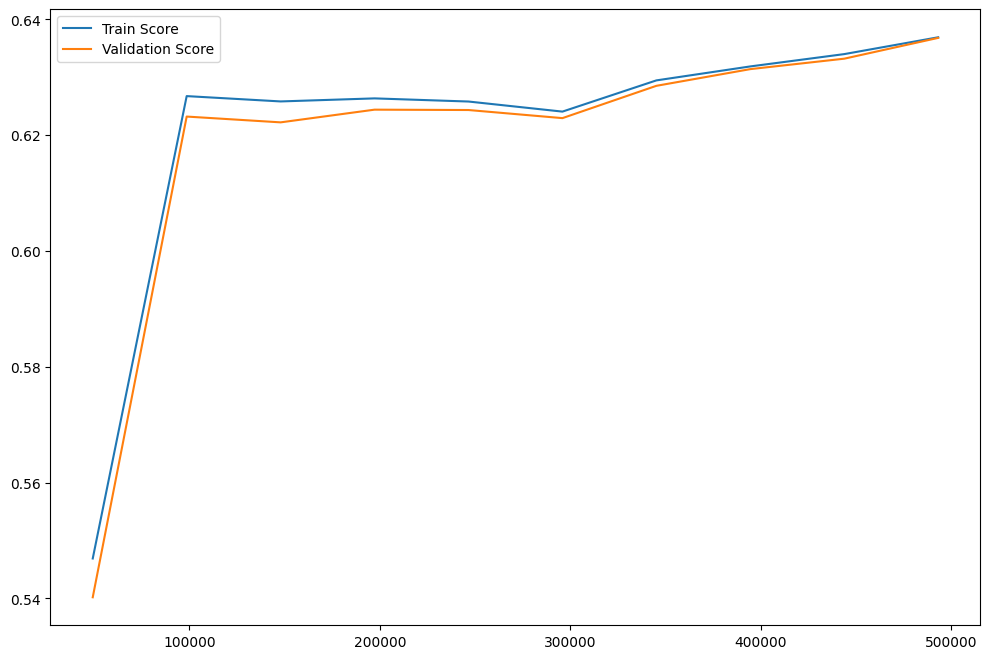

In [103]:
pipe = Pipeline([
    ('enc', encoder),
    ('poly', PolynomialFeatures()),
    ('select', SelectKBest(f_classif, k=20)),
    ('model', RandomForestClassifier(max_depth=10, class_weight='balanced', random_state=42, min_samples_split=5000, min_samples_leaf=2000)),
])

evaluation_ln(pipe)

In [ ]:
pipe = Pipeline([
    ('enc', encoder),
    ('poly', PolynomialFeatures()),
    ('select', SelectKBest(f_classif, k=20)),
    ('model', RandomForestClassifier(max_depth=10, class_weight='balanced', random_state=42, min_samples_split=5000, min_samples_leaf=2000)),
])

evaluation_ln(pipe)

## **Entraînement de plusieurs modèles**

In [57]:
list_models = [
    RandomForestClassifier(max_depth=10, class_weight='balanced', random_state=42),
    GradientBoostingClassifier(max_depth=10, random_state=42),
    AdaBoostClassifier(random_state=42),
    LogisticRegression(class_weight='balanced', random_state=42),
    LogisticRegressionCV(class_weight='balanced', random_state=42),
    SGDClassifier(class_weight='balanced', random_state=42)
    ]


        
 Nom du modèle : RandomForestClassifier
        
F1 Score : 0.7233333333333334

        
Matrice de confusion : 
[[55820  6457]
 [ 1013  9765]]
        
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     62277
           1       0.60      0.91      0.72     10778

    accuracy                           0.90     73055
   macro avg       0.79      0.90      0.83     73055
weighted avg       0.93      0.90      0.91     73055

    


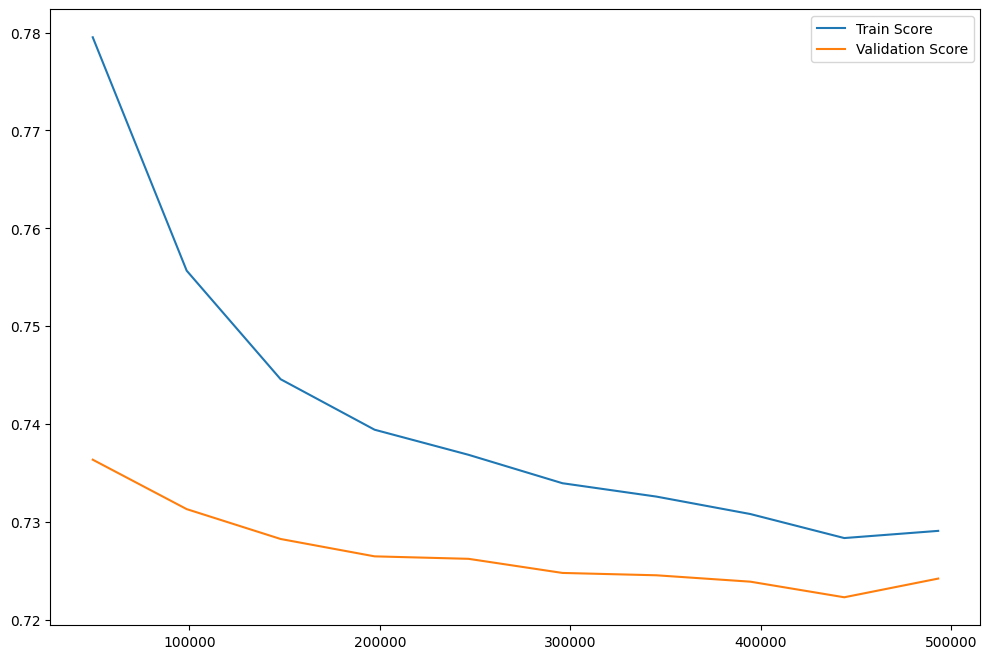


        
 Nom du modèle : GradientBoostingClassifier
        
F1 Score : 0.790529810884943

        
Matrice de confusion : 
[[60488  1789]
 [ 2564  8214]]
        
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     62277
           1       0.82      0.76      0.79     10778

    accuracy                           0.94     73055
   macro avg       0.89      0.87      0.88     73055
weighted avg       0.94      0.94      0.94     73055

    


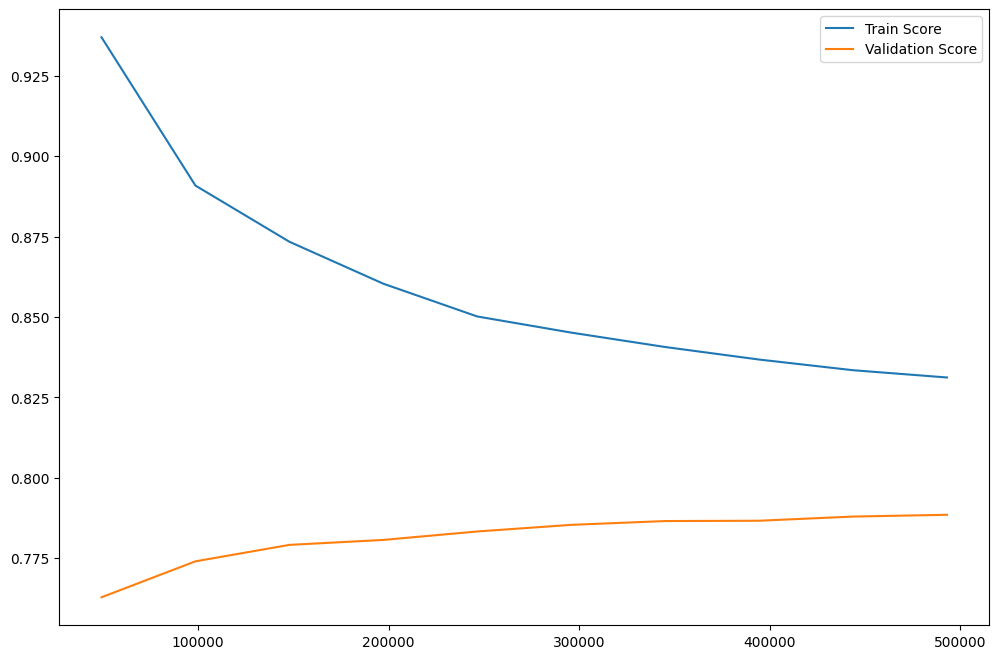


        
 Nom du modèle : AdaBoostClassifier
        
F1 Score : 0.6800989384726372

        
Matrice de confusion : 
[[60248  2029]
 [ 4179  6599]]
        
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     62277
           1       0.76      0.61      0.68     10778

    accuracy                           0.92     73055
   macro avg       0.85      0.79      0.82     73055
weighted avg       0.91      0.92      0.91     73055

    


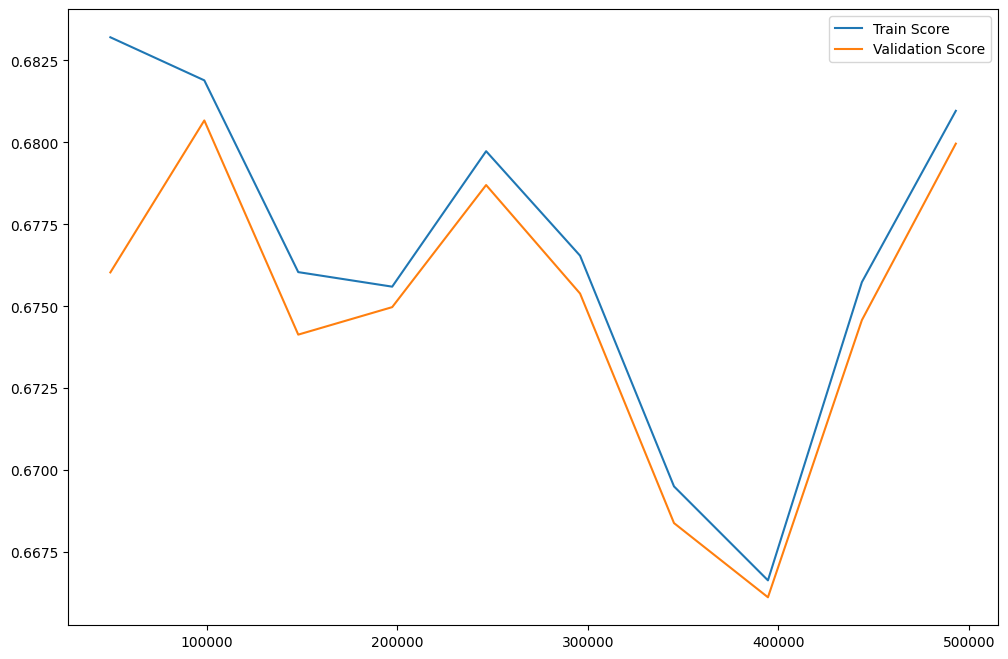


        
 Nom du modèle : LogisticRegression
        
F1 Score : 0.43726395300041965

        
Matrice de confusion : 
[[43263 19014]
 [ 2442  8336]]
        
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     62277
           1       0.30      0.77      0.44     10778

    accuracy                           0.71     73055
   macro avg       0.63      0.73      0.62     73055
weighted avg       0.85      0.71      0.75     73055

    


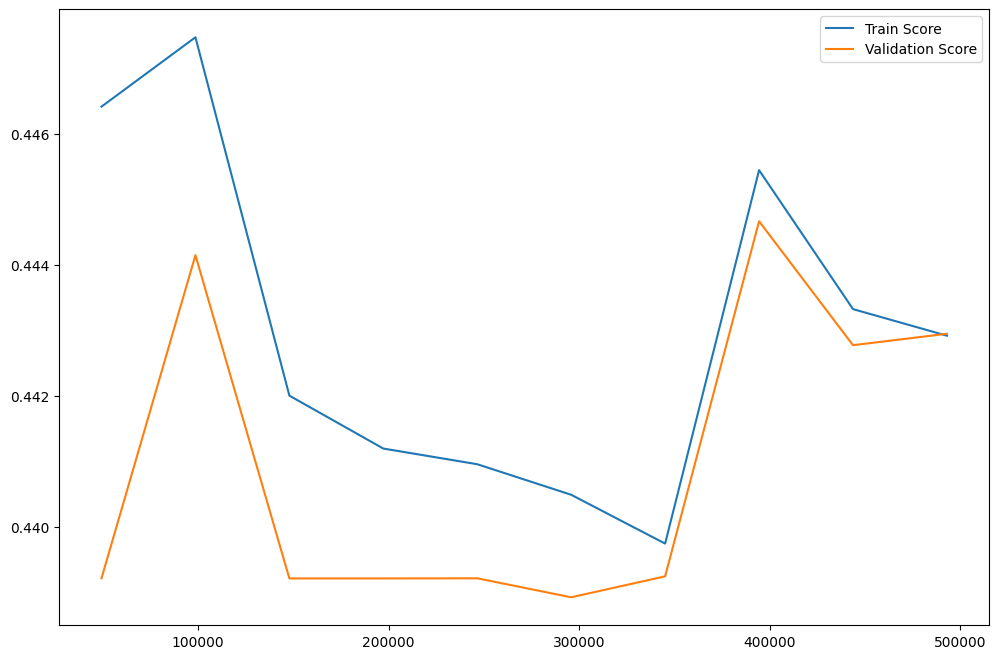


        
 Nom du modèle : LogisticRegressionCV
        
F1 Score : 0.43726395300041965

        
Matrice de confusion : 
[[43263 19014]
 [ 2442  8336]]
        
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     62277
           1       0.30      0.77      0.44     10778

    accuracy                           0.71     73055
   macro avg       0.63      0.73      0.62     73055
weighted avg       0.85      0.71      0.75     73055

    


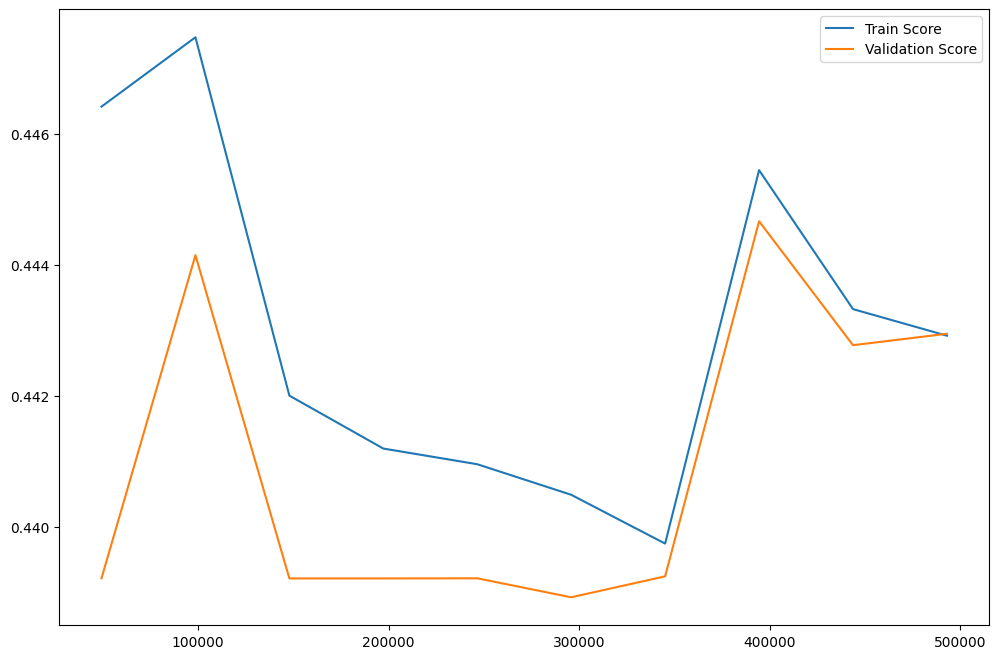


        
 Nom du modèle : SGDClassifier
        
F1 Score : 0.4837001438672749

        
Matrice de confusion : 
[[48287 13990]
 [ 2877  7901]]
        
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.94      0.78      0.85     62277
           1       0.36      0.73      0.48     10778

    accuracy                           0.77     73055
   macro avg       0.65      0.75      0.67     73055
weighted avg       0.86      0.77      0.80     73055

    


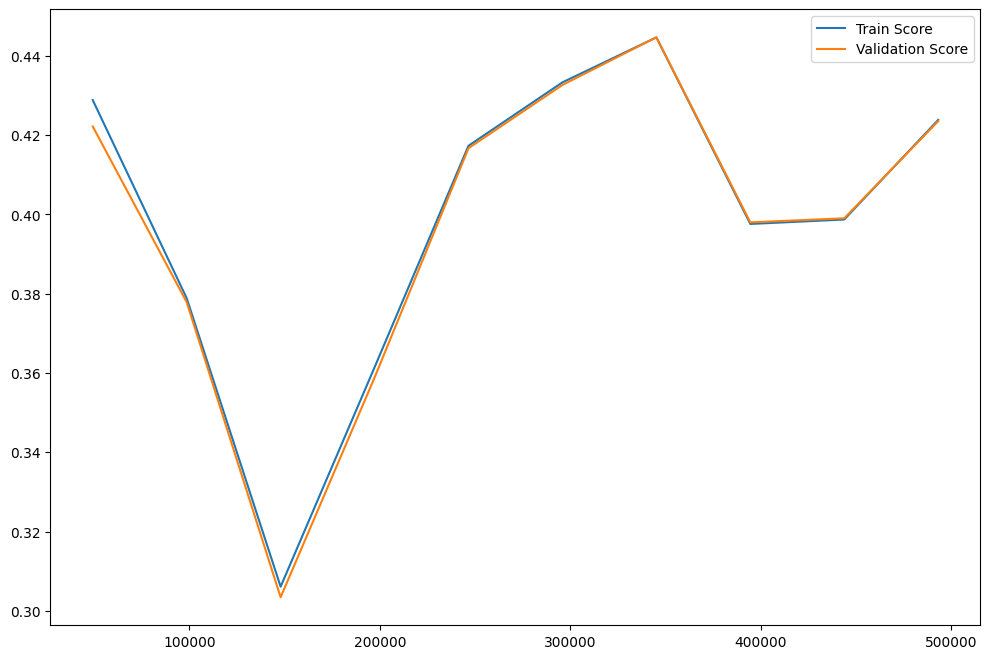

In [17]:
for model in list_models:
    pipe = Pipeline([
        ('enc', encoder),
        ('poly', PolynomialFeatures()),
        ('select', SelectKBest(f_classif, k=15)),
        ('model', model),
    ])

    evaluation(pipe)

## **Polynomial Selection**

Range : 1

        
 Nom du modèle : GradientBoostingClassifier
        
F1 Score : 0.8085924359652074

        
Matrice de confusion : 
[[60659  1618]
 [ 2365  8413]]
        
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     62277
           1       0.84      0.78      0.81     10778

    accuracy                           0.95     73055
   macro avg       0.90      0.88      0.89     73055
weighted avg       0.94      0.95      0.94     73055

    


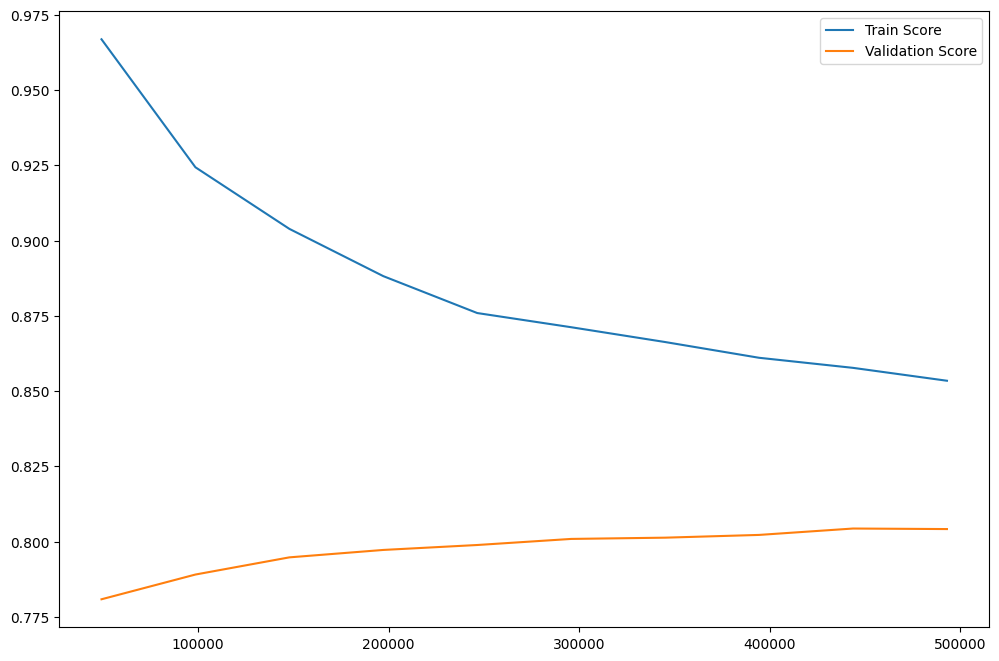

Range : 2

        
 Nom du modèle : GradientBoostingClassifier
        
F1 Score : 0.790529810884943

        
Matrice de confusion : 
[[60488  1789]
 [ 2564  8214]]
        
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     62277
           1       0.82      0.76      0.79     10778

    accuracy                           0.94     73055
   macro avg       0.89      0.87      0.88     73055
weighted avg       0.94      0.94      0.94     73055

    


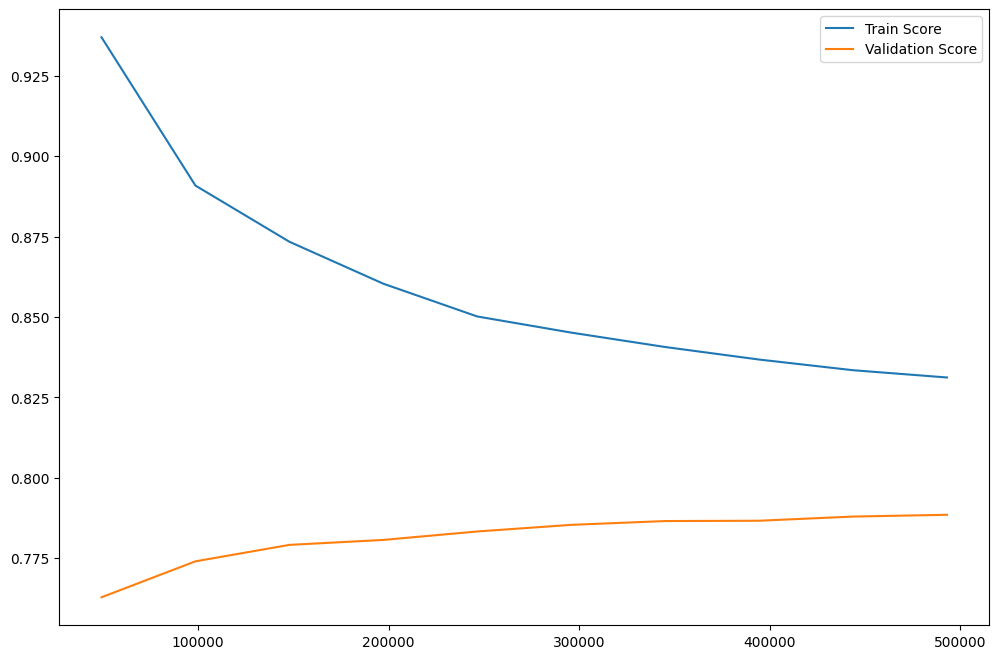

Range : 3


: 

: 

In [18]:
for i in range(1, 5):
    pipe = Pipeline([
        ('enc', encoder),
        ('poly', PolynomialFeatures(i)),
        ('select', SelectKBest(f_classif, k=15)),
        ('model', GradientBoostingClassifier(max_depth=10, random_state=42)),
    ])
    print(f"Range : {i}")
    evaluation(pipe)

## **Kbest Selection**

In [58]:
for i in range(1, 25, 3):
    pipe = Pipeline([
        ('enc', encoder),
        ('poly', PolynomialFeatures()),
        ('select', SelectKBest(f_classif, k=i)),
        ('model', GradientBoostingClassifier(max_depth=10, random_state=42)),
    ])
    print(f"Range : {i}")
    evaluation(pipe)

Range : 1

        
 Nom du modèle : GradientBoostingClassifier
        
F1 Score : 0.4262904335856848

        
Matrice de confusion : 
[[61622   655]
 [ 7681  3097]]
        
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     62277
           1       0.83      0.29      0.43     10778

    accuracy                           0.89     73055
   macro avg       0.86      0.64      0.68     73055
weighted avg       0.88      0.89      0.86     73055

    
Range : 4

        
 Nom du modèle : GradientBoostingClassifier
        
F1 Score : 0.7558161891943856

        
Matrice de confusion : 
[[60113  2164]
 [ 2916  7862]]
        
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     62277
           1       0.78      0.73      0.76     10778

    accuracy                           0.93     73055
   macro avg       0.87      0.85     

## **RandomizedSearchCV**

In [23]:
pipe = Pipeline([
    ('enc', encoder), 
    ('poly', PolynomialFeatures(1)), 
    ('select', SelectKBest(f_classif, k=20)),
    ('model', GradientBoostingClassifier(random_state=42)),
])

param_grid = {
    'model__max_depth': range(1, 20, 1),
    'model__loss': ['log_loss','exponential'],
    'model__learning_rate': np.arange(0.1, 1, 0.1),
    'model__n_estimators': range(10, 200, 10),
    'model__criterion': ['friedman_mse', 'squared_error'],
    'model__min_samples_split': range(20000, 1000, -200),
}

grid = RandomizedSearchCV(pipe, param_grid, cv=4, scoring='f1', random_state=42, n_jobs=4, n_iter=5)

grid.fit(X_train, y_train)

score = grid.best_score_
score = round(score,4)

params = grid.best_params_

print(f"Meilleur score : {round(score * 100, 2)}% \nMeilleurs paramètres : {params}")

In [54]:
pipe = Pipeline([
    ('enc', encoder), 
    ('poly', PolynomialFeatures(1)), 
    ('select', SelectKBest(f_classif, k=20)),
    ('model', GradientBoostingClassifier(random_state=42, loss='log_loss', criterion='squared_error', n_estimators=110)),
])

param_grid = {
    'model__n_estimators': range(100, 150, 5),
    'model__max_depth': range(15, 20, 1),
    'model__learning_rate': np.arange(0.1, 0.5, 0.1),
    'model__min_samples_split': range(6000, 7000, 100),
}

grid = RandomizedSearchCV(pipe, param_grid, cv=4, scoring='f1', random_state=42, n_jobs=4, n_iter=5, verbose=3)

grid.fit(X_train, y_train)

score = grid.best_score_
score = round(score,4)

params = grid.best_params_

print(f"Meilleur score : {round(score * 100, 2)}% \nMeilleurs paramètres : {params}")

Fitting 4 folds for each of 5 candidates, totalling 20 fits


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constan

[CV 2/4] END model__learning_rate=0.30000000000000004, model__max_depth=16, model__min_samples_split=6200, model__n_estimators=130;, score=0.806 total time=10.6min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 4/4] END model__learning_rate=0.30000000000000004, model__max_depth=16, model__min_samples_split=6200, model__n_estimators=130;, score=0.804 total time=10.7min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 1/4] END model__learning_rate=0.30000000000000004, model__max_depth=16, model__min_samples_split=6200, model__n_estimators=130;, score=0.804 total time=10.8min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 3/4] END model__learning_rate=0.30000000000000004, model__max_depth=16, model__min_samples_split=6200, model__n_estimators=130;, score=0.804 total time=10.9min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 2/4] END model__learning_rate=0.30000000000000004, model__max_depth=19, model__min_samples_split=6500, model__n_estimators=145;, score=0.806 total time=12.1min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 1/4] END model__learning_rate=0.30000000000000004, model__max_depth=19, model__min_samples_split=6500, model__n_estimators=145;, score=0.805 total time=12.4min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 4/4] END model__learning_rate=0.30000000000000004, model__max_depth=19, model__min_samples_split=6500, model__n_estimators=145;, score=0.805 total time=12.2min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 3/4] END model__learning_rate=0.30000000000000004, model__max_depth=19, model__min_samples_split=6500, model__n_estimators=145;, score=0.803 total time=12.4min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 1/4] END model__learning_rate=0.2, model__max_depth=18, model__min_samples_split=6600, model__n_estimators=100;, score=0.804 total time= 7.3min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 2/4] END model__learning_rate=0.2, model__max_depth=18, model__min_samples_split=6600, model__n_estimators=100;, score=0.804 total time= 7.3min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 3/4] END model__learning_rate=0.2, model__max_depth=18, model__min_samples_split=6600, model__n_estimators=100;, score=0.803 total time= 7.3min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 4/4] END model__learning_rate=0.2, model__max_depth=18, model__min_samples_split=6600, model__n_estimators=100;, score=0.805 total time= 7.4min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 1/4] END model__learning_rate=0.30000000000000004, model__max_depth=17, model__min_samples_split=6900, model__n_estimators=120;, score=0.805 total time= 8.6min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 3/4] END model__learning_rate=0.30000000000000004, model__max_depth=17, model__min_samples_split=6900, model__n_estimators=120;, score=0.802 total time= 8.7min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 2/4] END model__learning_rate=0.30000000000000004, model__max_depth=17, model__min_samples_split=6900, model__n_estimators=120;, score=0.805 total time= 8.8min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 4/4] END model__learning_rate=0.30000000000000004, model__max_depth=17, model__min_samples_split=6900, model__n_estimators=120;, score=0.805 total time= 8.7min


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV 1/4] END model__learning_rate=0.30000000000000004, model__max_depth=16, model__min_samples_split=6300, model__n_estimators=100;, score=0.804 total time= 7.6min
[CV 2/4] END model__learning_rate=0.30000000000000004, model__max_depth=16, model__min_samples_split=6300, model__n_estimators=100;, score=0.804 total time= 7.5min
[CV 3/4] END model__learning_rate=0.30000000000000004, model__max_depth=16, model__min_samples_split=6300, model__n_estimators=100;, score=0.805 total time= 7.5min
[CV 4/4] END model__learning_rate=0.30000000000000004, model__max_depth=16, model__min_samples_split=6300, model__n_estimators=100;, score=0.805 total time= 7.5min
Meilleur score : 80.48% 
Meilleurs paramètres : {'model__n_estimators': 145, 'model__min_samples_split': 6500, 'model__max_depth': 19, 'model__learning_rate': 0.30000000000000004}



        
 Nom du modèle : GradientBoostingClassifier
        
F1 Score : 0.8038634407573874

        
Matrice de confusion : 
[[60547  1730]
 [ 2372  8406]]
        
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     62277
           1       0.83      0.78      0.80     10778

    accuracy                           0.94     73055
   macro avg       0.90      0.88      0.89     73055
weighted avg       0.94      0.94      0.94     73055

    


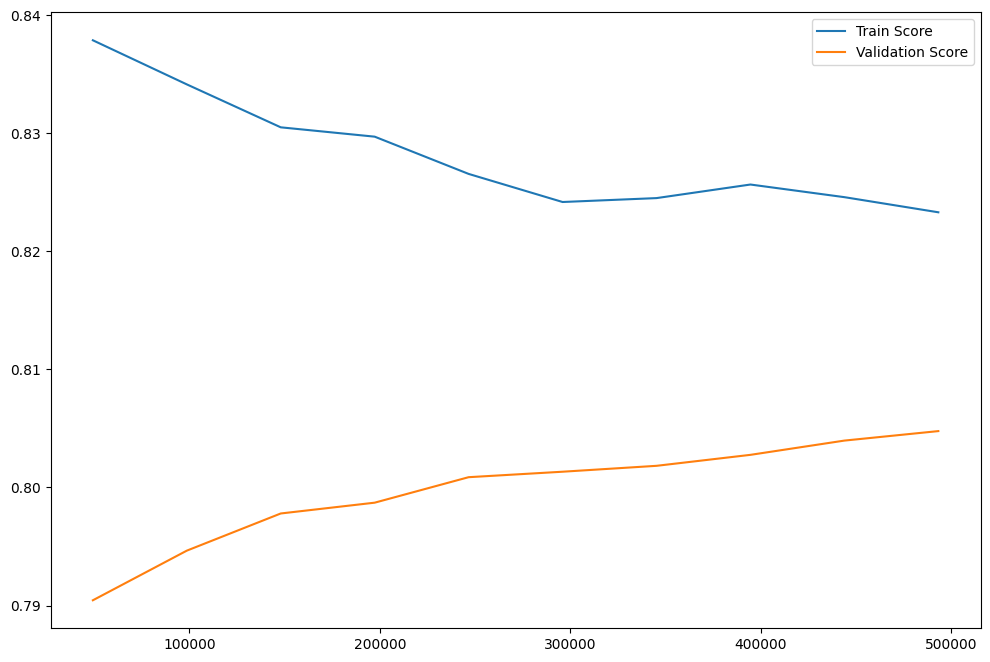

In [56]:
pipe = Pipeline([
    ('enc', encoder),
    ('poly', PolynomialFeatures(1)),
    ('select', SelectKBest(f_classif, k=20)),
    ('model', GradientBoostingClassifier(random_state=42, loss='log_loss', criterion='squared_error', n_estimators=100, learning_rate=0.3, min_samples_split=7000, max_depth=20)),
])

evaluation_ln(pipe)

## **GridSearchCV**

In [84]:
# pipe = Pipeline([
#     ('enc', encoder), 
#     ('poly', PolynomialFeatures(1)), 
#     ('select', SelectKBest(f_classif, k=20)),
#     ('model', GradientBoostingClassifier(random_state=42, loss='log_loss', criterion='squared_error', n_estimators=100, learning_rate=0.3, min_samples_split=7000, max_depth=i)),
# ])

# param_grid = {
#     'model__max_depth': range(25, 46, 5),
#     'model__min_samples_split': range(5000, 7000, 500),
# }

# grid = GridSearchCV(pipe, param_grid, cv=4, scoring='f1', n_jobs=4, verbose=3)

# grid.fit(X_train, y_train)

# score = grid.best_score_
# score = round(score,4)

# params = grid.best_params_

# print(f"Meilleur score : {round(score * 100, 2)}% \nMeilleurs paramètres : {params}")

In [89]:
for depth in range(25, 46, 5):
    for sample in range (5000,7001, 500):
        pipe = Pipeline([
            ('enc', encoder),
            ('poly', PolynomialFeatures(1)),
            ('select', SelectKBest(f_classif, k=20)),
            ('model', GradientBoostingClassifier(random_state=42, loss='log_loss', criterion='squared_error', n_estimators=100, learning_rate=0.3, min_samples_split=sample, max_depth=depth)),
        ])

        print("Depth :", depth)
        print("Sample :", sample)
        evaluation(pipe)

Depth : 25
Sample : 5000

        
 Nom du modèle : GradientBoostingClassifier

        
F1 Score : 0.8034359341445955

        
Matrice de confusion : 
[[60518  1759]
 [ 2360  8418]]

        
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     62277
           1       0.83      0.78      0.80     10778

    accuracy                           0.94     73055
   macro avg       0.89      0.88      0.89     73055
weighted avg       0.94      0.94      0.94     73055


    
Depth : 25
Sample : 5500

        
 Nom du modèle : GradientBoostingClassifier

        
F1 Score : 0.8059245102723364

        
Matrice de confusion : 
[[60559  1718]
 [ 2344  8434]]

        
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     62277
           1       0.83      0.78      0.81     10778

    accuracy                           0.94     73055
   

## **Amélioration du Recall**

In [19]:
pipe = Pipeline([
    ('enc', encoder),
    ('poly', PolynomialFeatures(1)),
    ('select', SelectKBest(f_classif, k=20)),
    ('model', GradientBoostingClassifier(random_state=42, loss='log_loss', criterion='squared_error', n_estimators=100, learning_rate=0.2, min_samples_split=7000, max_depth=20)),
])

model = pipe.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, model.decision_function(X_test))

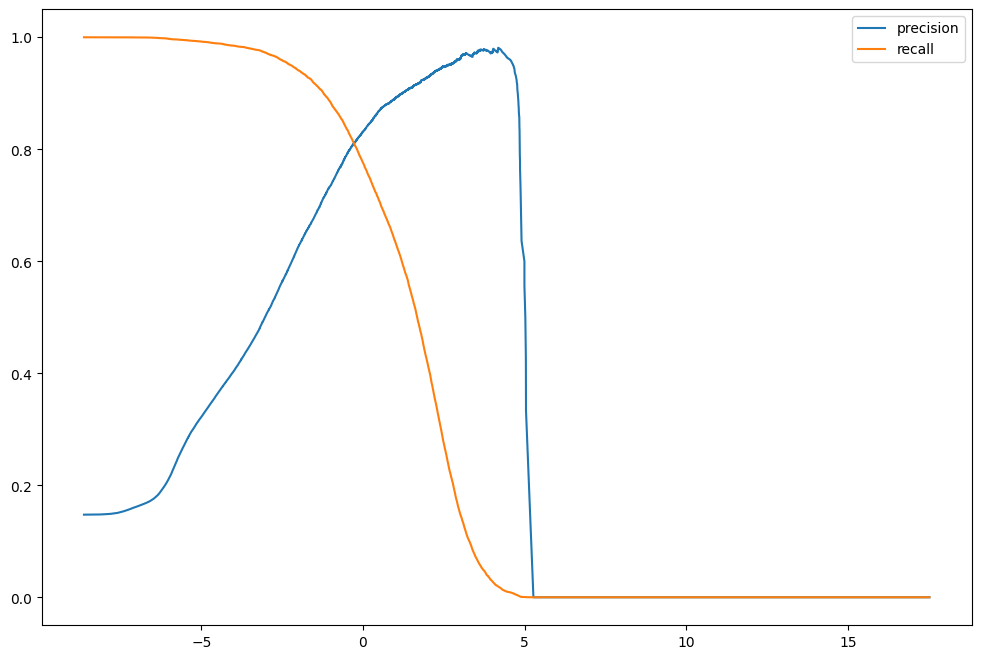

In [180]:
plt.figure(figsize=(12,8))

plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')

plt.legend()
plt.show()

In [ ]:
def model_final (model, X, seuil=0):
    return model.decision_function(X) > seuil

In [ ]:
prediction = model_final(model, X_test, -1)

score_f1 = f1_score(y_test, prediction)

print(f'''
    F1 Score : {score_f1}\n
    \nMatrice de confusion : \n{confusion_matrix(y_test, prediction)}\n
    \nRapport de classification : \n{classification_report(y_test, prediction)}\n
''')


    F1 Score : 0.8028821843923815

    
Matrice de confusion : 
[[58850  3427]
 [ 1251  9527]]

    
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     62277
           1       0.74      0.88      0.80     10778

    accuracy                           0.94     73055
   macro avg       0.86      0.91      0.88     73055
weighted avg       0.94      0.94      0.94     73055





## **Test Final**

In [ ]:
Training = pd.concat([X_train, X_test], axis=0)
Test = pd.concat([y_train, y_test], axis=0)

In [ ]:
pipe = Pipeline([
    ('enc', encoder),
    ('poly', PolynomialFeatures(1)),
    ('select', SelectKBest(f_classif, k=20)),
    ('model', GradientBoostingClassifier(random_state=42, loss='log_loss', criterion='squared_error', n_estimators=100, learning_rate=0.2, min_samples_split=7000, max_depth=20)),
])

model = pipe.fit(Training, Test)

prediction = model_final(model, the_X_test, -1)

score_f1 = f1_score(the_y_test, prediction)

print(f'''
    \nF1 Score : {score_f1}\n
    \nMatrice de confusion : \n{confusion_matrix(the_y_test, prediction)}\n
    \nRapport de classification : \n{classification_report(the_y_test, prediction)}\n
''')


    
F1 Score : 0.8089380893808938

    
Matrice de confusion : 
[[12004   705]
 [  227  1973]]

    
Rapport de classification : 
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     12709
           1       0.74      0.90      0.81      2200

    accuracy                           0.94     14909
   macro avg       0.86      0.92      0.89     14909
weighted avg       0.95      0.94      0.94     14909





In [ ]:
model.predict(the_X_test)[0]

0

In [ ]:
model.predict_proba(the_X_test)[0]

array([0.99651834, 0.00348166])

In [ ]:
the_y_test.iloc[0]

0

In [ ]:
model.seuil = -1

In [ ]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_can_inverse_transform',
 '_can_transform',
 '_check_feature_names',
 '_check_fit_params',
 '_check_n_features',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_iter',
 '_log_message',
 '_more_tags',
 '_replace_estimator',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_params',
 '_sk_visual_block_',
 '_validate_data',
 '_validate_names',
 '_validate_params',
 '_validate_steps',
 

In [ ]:
dump(model, f"models/{model.named_steps.model.__class__.__name__}.pkl")

['models/GradientBoostingClassifier.pkl']

In [ ]:
df.head(1)

,mois,nb_employes,creation,emploi_crees,franchise,emplacement,cred_renouvelable,petit_pret,montant,secteur,TARGET,secure,type_entreprise
0,84,4,1,0,1,0,0,1,60000.0,44,0,0,TPE


In [ ]:
inputs = {'mois': 200, 'nb_employes': 5, 'creation': 0, 'emploi_crees': 10, 'franchise': 1, 'emplacement': 0, 'cred_renouvelable': 1, 'petit_pret': 0, 'montant': 500000, 'secteur': 44, 'secure': 0, 'type_entreprise': "TPE"}
test = pd.DataFrame([inputs])

model.predict_proba(test)

array([[0.90580416, 0.09419584]])

In [ ]:
model.get_params()

NameError: name 'model' is not defined

In [31]:
    # models_select = ['RandomForestClassifier']

    # if model.named_steps.model.__class__.__name__ in models_select :
    #     # Récupération des importances de chaque caractéristique
    #     feature_importances = model.named_steps['model'].feature_importances_

    #     # Récupération des caractéristiques sélectionnées par SelectKBest
    #     selector = model.named_steps['enc'].get_support()

    #     # Récupération des noms des caractéristiques correspondants
    #     feature_names = model.named_steps['enc'].get_feature_names_out()
    #     selected_feature_names = [feature_names[i] for i, x in enumerate(selector) if x]

    #     # Sélection des importances correspondant aux caractéristiques sélectionnées
    #     selected_importances = feature_importances[selector]

    #     # Création du dataframe
    #     df_importance = pd.DataFrame(data=selected_importances, columns=['importance'], index=selected_feature_names)

    #     # Tri et affichage des 10 premières lignes
    #     print(df_importance.sort_values('importance', ascending=False).head(10))

    # else:
    #     # Récupération des caractéristiques sélectionnées par SelectKBest
    #     selector = model.named_steps['enc'].get_support()

    #     # Récupération des noms des caractéristiques correspondants
    #     feature_names = model.named_steps['enc'].get_feature_names_out()
    #     selected_feature_names = [feature_names[i] for i, x in enumerate(selector) if x]

    #     # Récupération des poids
    #     coef = model.named_steps['model'].coef_

    #     # Sélection des poids correspondant aux caractéristiques sélectionnées
    #     selected_coef = coef[:, selector]

    #     # Création du dataframe
    #     df_importance = pd.DataFrame(data=selected_coef, columns=['coef'], index=selected_feature_names)

    #     # Tri et affichage des 10 premières lignes
    #     print(df_importance.sort_values('coef', ascending=False).head(10))


    # # Tri et affichage des 10 premières lignes
    # print(df_importance.sort_values('coef', ascending=False).head(10))

    # plt.figure()
    # df_importance.sort_values('coef', ascending=False).head(20).plot(kind='bar')
    # plt.show()